In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load dữ liệu và kiểm tra cơ bản

In [4]:
file_path = '/home/ducanh/Financial Risk & Fraud Detection/Credit Card Fraud Detection/Datasets/CCFD/CCFD_Data_3Gb.csv'
df = pd.read_csv(file_path)
print("Thông tin dataset:")
print(df.info())
print("\nCác feature có trong dataset:")
print(df.columns.tolist())
print("\nMột vài dòng dữ liệu mẫu:")
print(df.head())

Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580255 entries, 0 to 8580254
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ssn                         object 
 1   cc_num                      int64  
 2   first                       object 
 3   last                        object 
 4   gender                      object 
 5   street                      object 
 6   city                        object 
 7   state                       object 
 8   zip                         int64  
 9   lat                         float64
 10  long                        float64
 11  city_pop                    int64  
 12  job                         object 
 13  dob                         object 
 14  acct_num                    int64  
 15  profile                     object 
 16  trans_num                   object 
 17  unix_time                   int64  
 18  category                    object 
 19  am

## 2. Xử lý dữ liệu thời gian


In [6]:
# Chuyển đổi cột 'trans_date_trans_time' sang kiểu datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Sắp xếp dữ liệu theo 'cc_num' và 'trans_date_trans_time'
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Tính toán delta T: hiệu số thời gian giữa các giao dịch của cùng một cc_num dựa trên cột 'unix_time'
df['delta_T'] = df.groupby('cc_num')['unix_time'].diff()
df['delta_T_minutes'] = df['delta_T'] / 60  # chuyển đổi từ giây sang phút

# Hiển thị vài dòng dữ liệu đã xử lý
print("\nDữ liệu sau khi tính delta_T:")
print(df[['cc_num', 'trans_date_trans_time', 'unix_time', 'delta_T', 'delta_T_minutes']].head(10))


Dữ liệu sau khi tính delta_T:
              cc_num trans_date_trans_time   unix_time  delta_T  \
75425    60400268763   2022-05-07 02:33:20  1651887200      NaN   
1100288  60400268763   2022-05-07 04:23:11  1651893791   6591.0   
6651552  60400268763   2022-05-07 06:48:19  1651902499   8708.0   
7553236  60400268763   2022-05-07 08:31:03  1651908663   6164.0   
2739569  60400268763   2022-05-07 11:34:07  1651919647  10984.0   
2160396  60400268763   2022-05-08 03:14:42  1651976082  56435.0   
6331236  60400268763   2022-05-08 05:45:43  1651985143   9061.0   
87110    60400268763   2022-05-08 06:25:57  1651987557   2414.0   
2229932  60400268763   2022-05-08 08:40:09  1651995609   8052.0   
8188869  60400268763   2022-05-08 09:07:16  1651997236   1627.0   

         delta_T_minutes  
75425                NaN  
1100288       109.850000  
6651552       145.133333  
7553236       102.733333  
2739569       183.066667  
2160396       940.583333  
6331236       151.016667  
87110          

## 3. Trực quan hóa dữ liệu thời gian giao dịch

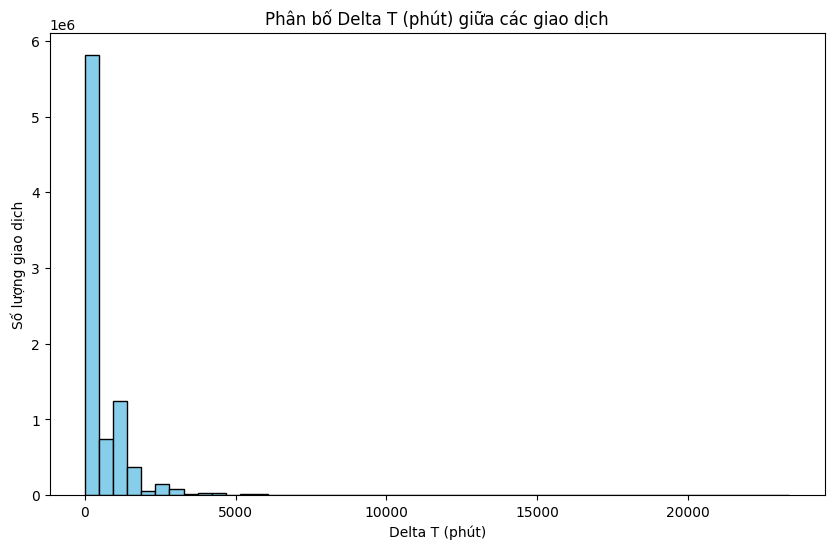

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['delta_T_minutes'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Delta T (phút)')
plt.ylabel('Số lượng giao dịch')
plt.title('Phân bố Delta T (phút) giữa các giao dịch')
plt.show()

## 4. Phân tích các biến giao dịch

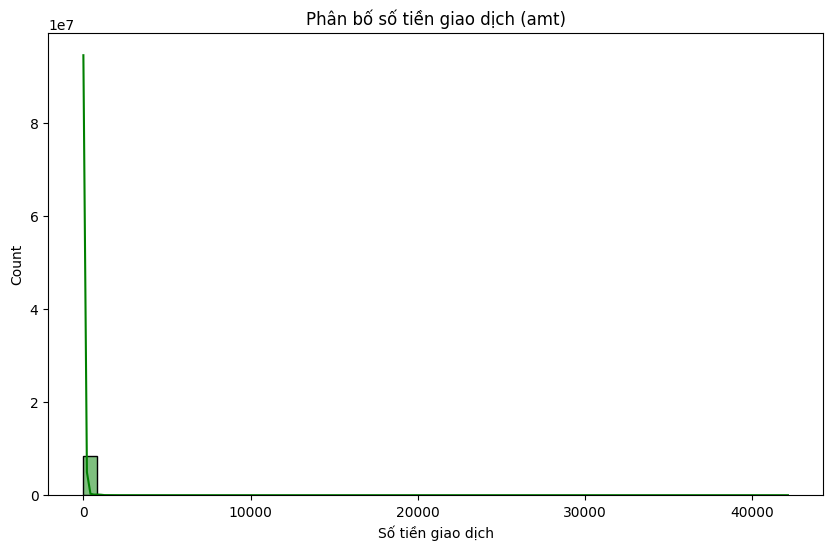

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True, color='green')
plt.xlabel('Số tiền giao dịch')
plt.title('Phân bố số tiền giao dịch (amt)')
plt.show()

/tmp/ipykernel_1725390/1602661124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='Set2')


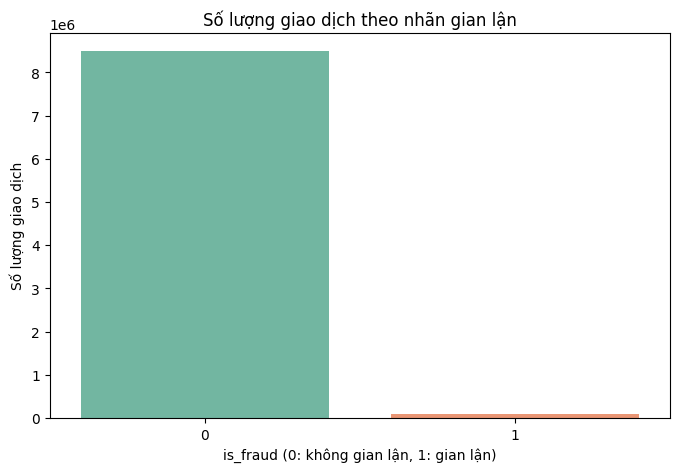

In [ ]:
if 'is_fraud' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='is_fraud', data=df, palette='Set2')
    plt.xlabel('is_fraud (0: không gian lận, 1: gian lận)')
    plt.ylabel('Số lượng giao dịch')
    plt.title('Số lượng giao dịch theo nhãn gian lận')
    plt.show()
else:
    print("Cột 'is_fraud' không tồn tại trong dataset.")

## 5. Phân tích thêm các đặc trưng quan trọng

In [ ]:
cols_to_describe = [
    'customer_num_trans_1_day', 'customer_num_trans_7_day', 'customer_num_trans_30_day',
    'customer_avg_amout_1_day', 'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
    'merchant_num_trans_1_day', 'merchant_num_trans_7_day', 'merchant_num_trans_30_day',
    'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day'
]

for col in cols_to_describe:
    if col in df.columns:
        print(f"\nThống kê cho {col}:")
        print(df[col].describe())
    else:
        print(f"\nCột {col} không tồn tại trong dataset.")


Thống kê cho customer_num_trans_1_day:
count    8.580255e+06
mean     3.000175e+00
std      1.999824e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: customer_num_trans_1_day, dtype: float64

Thống kê cho customer_num_trans_7_day:
count    8.580255e+06
mean     5.499836e+00
std      2.629442e+00
min      0.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      1.100000e+01
Name: customer_num_trans_7_day, dtype: float64

Thống kê cho customer_num_trans_30_day:
count    8.580255e+06
mean     1.299951e+01
std      3.135278e+00
min      5.000000e+00
25%      1.100000e+01
50%      1.300000e+01
75%      1.500000e+01
max      2.100000e+01
Name: customer_num_trans_30_day, dtype: float64

Thống kê cho customer_avg_amout_1_day:
count    8.580255e+06
mean     4.550037e+01
std      2.568704e+01
min      1.000000e+00
25%      2.325000e+01
50%      4.550000e+01
75%      6.774000e+01
max      9.0000

## 6. Ma trận tương quan

In [ ]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'trans_date_trans_time' in numeric_features:
    numeric_features.remove('trans_date_trans_time')

# Tính ma trận tương quan
corr_matrix = df[numeric_features].corr()

# Tính hệ số tương quan của các feature với is_fraud
corr_with_label = corr_matrix['is_fraud'].drop('is_fraud')

# Sắp xếp các feature theo độ tương quan tuyệt đối tăng dần (thấp nhất)
lowest_corr = corr_with_label.abs().sort_values(ascending=True).reset_index()
lowest_corr.columns = ['Feature', 'Correlation_with_is_fraud']

# Sắp xếp các feature theo độ tương quan tuyệt đối giảm dần (cao nhất)
highest_corr = corr_with_label.abs().sort_values(ascending=False).reset_index()
highest_corr.columns = ['Feature', 'Correlation_with_is_fraud']

print("Các feature có độ tương quan thấp nhất với is_fraud:")
print(lowest_corr)
print("\nCác feature có độ tương quan cao nhất với is_fraud:")
print(highest_corr)

Các feature có độ tương quan thấp nhất với is_fraud:
                       Feature  Correlation_with_is_fraud
0         merchant_risk_90_day                   0.000015
1    merchant_num_trans_30_day                   0.000033
2     customer_num_trans_7_day                   0.000089
3                          zip                   0.000094
4          trans_time_is_night                   0.000153
5     merchant_num_trans_1_day                   0.000162
6   customer_avg_amount_30_day                   0.000162
7          merchant_risk_7_day                   0.000173
8               trans_time_hrs                   0.000177
9                         long                   0.000188
10   customer_avg_amount_7_day                   0.000200
11   customer_num_trans_30_day                   0.000207
12                  merch_long                   0.000211
13    customer_num_trans_1_day                   0.000216
14         merchant_risk_1_day                   0.000279
15    merchant_num_

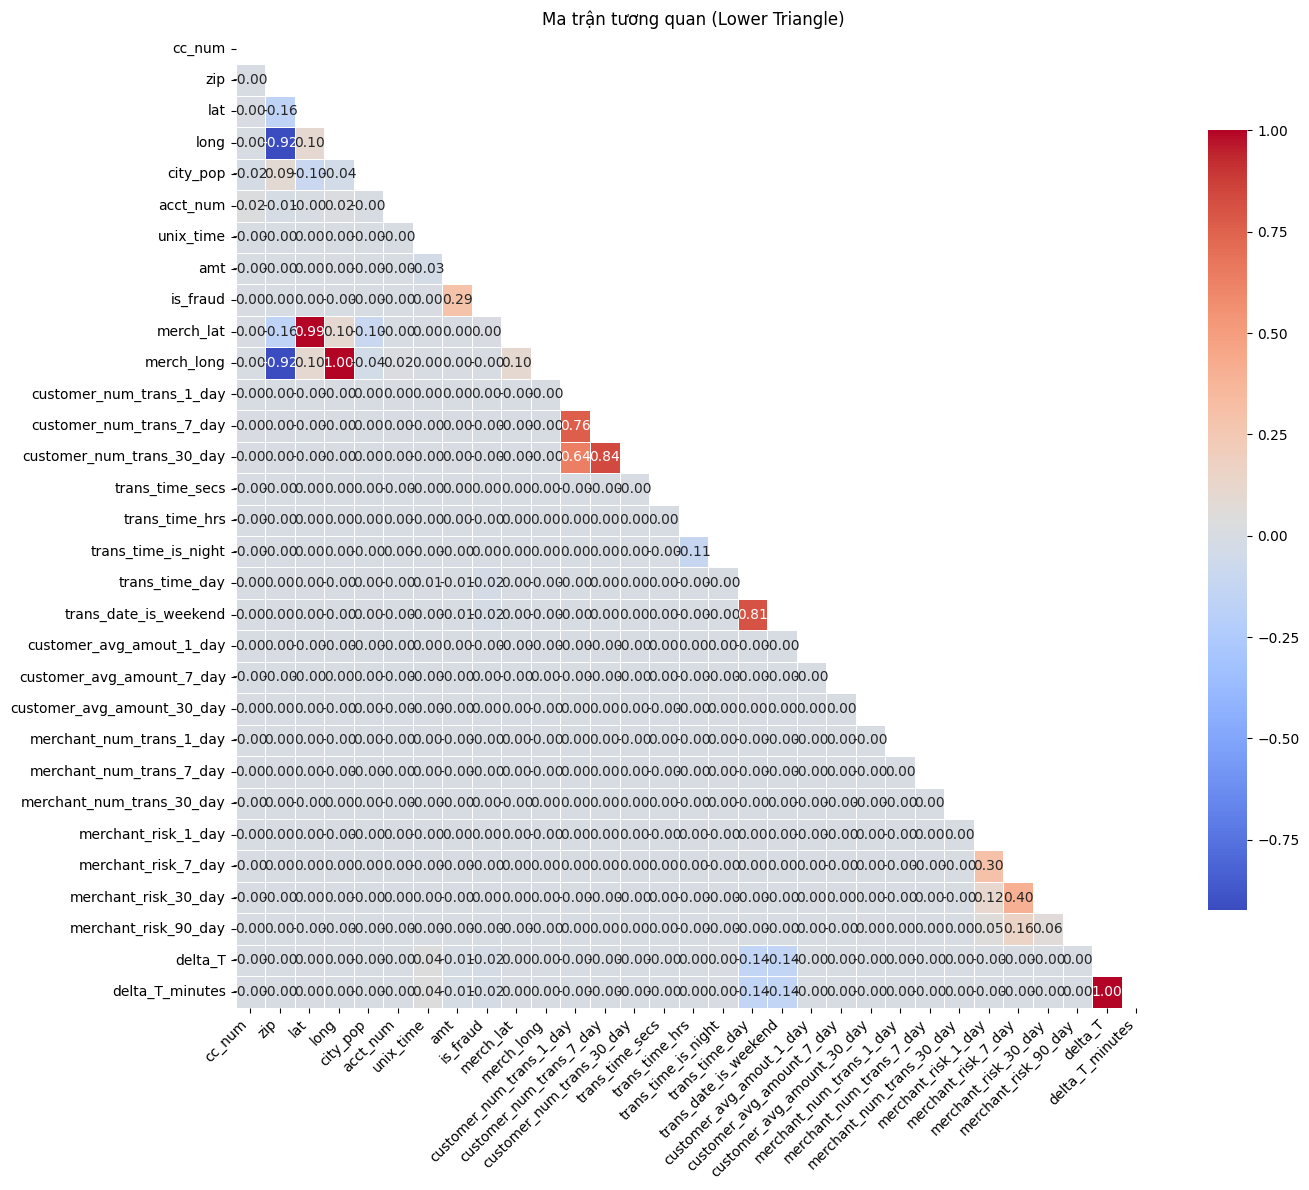

In [ ]:
# Vẽ heatmap của ma trận tương quan (chỉ hiển thị tam giác dưới để tránh trùng lặp)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Ma trận tương quan (Lower Triangle)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Kiểm tra mối quan hệ giữa số tiền giao dịch và gian lận (nếu có is_fraud)

/tmp/ipykernel_1725390/342941625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='amt', data=df, palette='Set3')


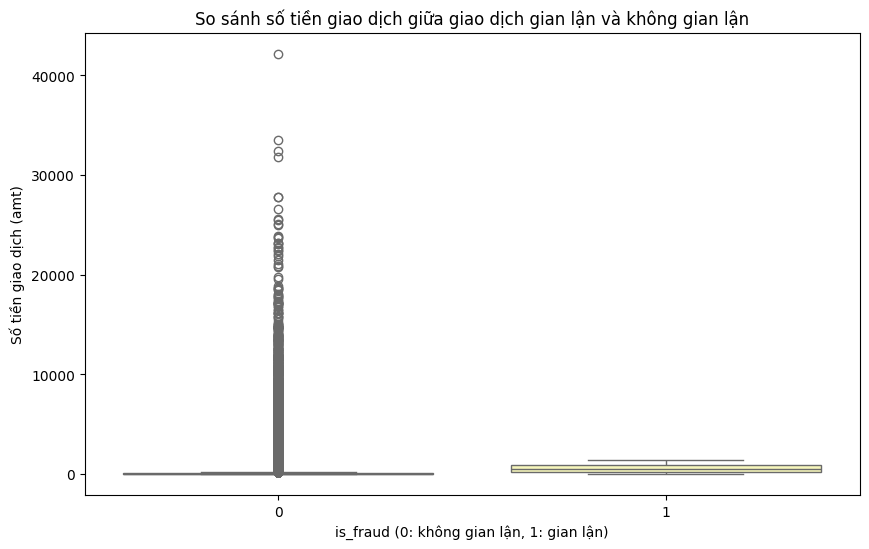

In [ ]:
if 'is_fraud' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_fraud', y='amt', data=df, palette='Set3')
    plt.xlabel('is_fraud (0: không gian lận, 1: gian lận)')
    plt.ylabel('Số tiền giao dịch (amt)')
    plt.title('So sánh số tiền giao dịch giữa giao dịch gian lận và không gian lận')
    plt.show()
else:
    print("Cột 'is_fraud' không tồn tại để so sánh số tiền giao dịch theo gian lận.")